In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from matplotlib.font_manager import FontProperties as FP
from matplotlib import colors as col

#Set ffmpeg location
plt.rcParams['animation.ffmpeg_path'] = '../ffmpeg/bin/ffmpeg.exe'

#Set fig size
plt.rcParams['figure.figsize'] = (20,12)

#Set font globally
plt.rcParams['font.family'] = ['fantasy']

#Set font variable for individual object
font = FP(fname="../Font/SimHei.ttf")

#Set style -> #https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
plt.style.use('ggplot')

In [2]:
df = pd.read_excel("../Data/CPI Quatity Weight.xlsx")
df

,Type,2021,2016,Amount of change
0,Food,25.4,23.7,1.7
1,Clothing and Footwear,5.3,4.6,0.7
2,Shelter,24.2,22.7,1.5
3,Transportation and Communication,14.4,15.3,-0.9
4,Medical Care,4.8,4.3,0.5
5,Recreation & Education,12.9,14.7,-1.9
6,Other Goods & Services,13.0,14.7,-1.7


In [3]:
item = df["Type"]
item_value = df[2021]
item_value_old = df[2016]

#Decide which slice will be "explode", and the distance between the slice and the center of pie chart
explode = (0,0,0,0,0,0,0.2)

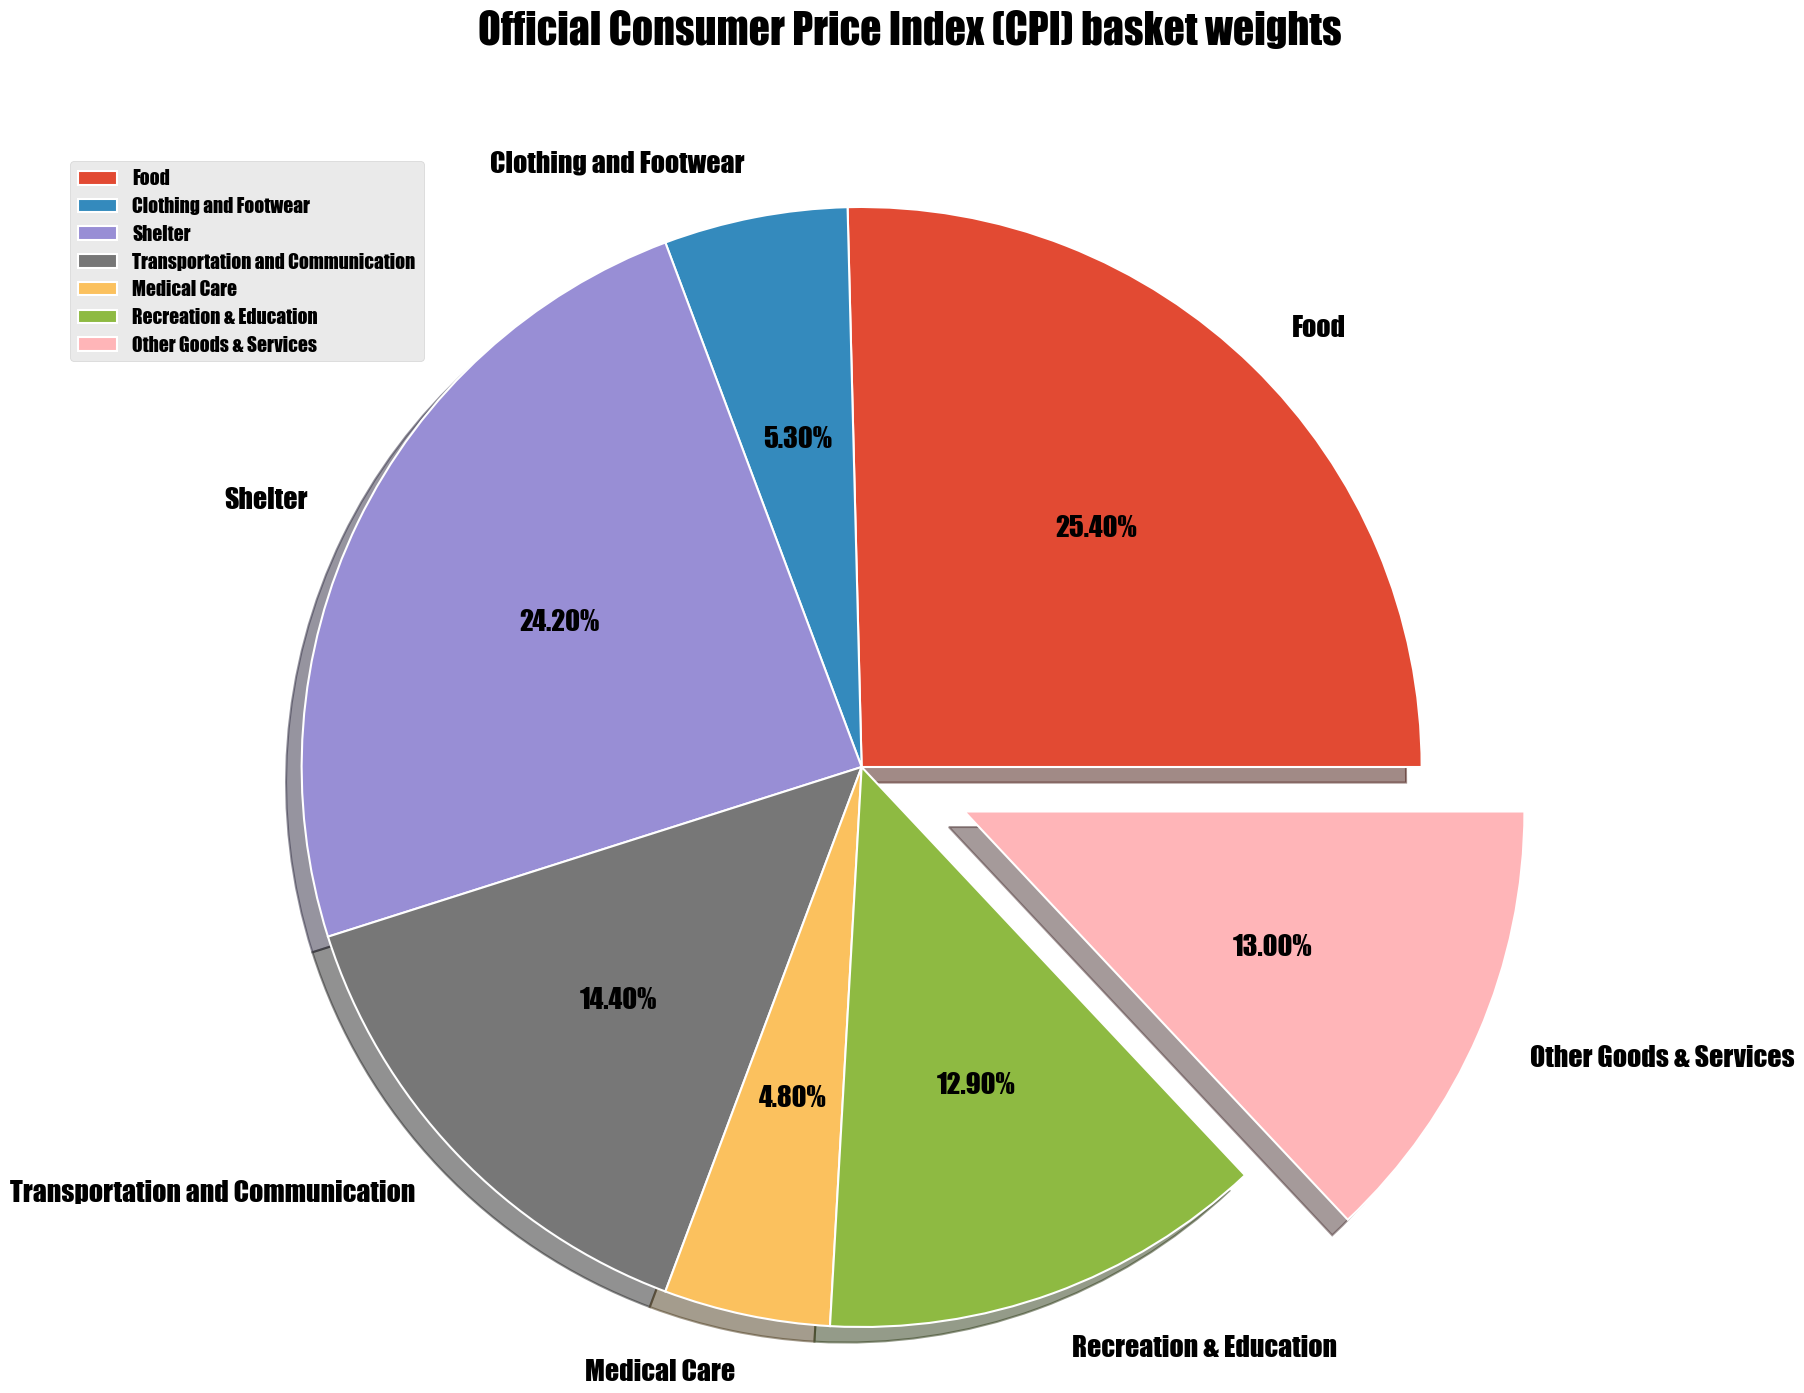

In [4]:
# Animated Pie Chart
fig, ax = plt.subplots()

#Set fig size
fig.set_figwidth(22)
fig.set_figheight(16)

def animate(i):

     #Must clear previous chart first and draw new one with additional data
     ax.clear()

     ax.pie(x=item_value.values[:i], 
        labels=item.values[:i],
        explode=explode[:i], 
        autopct='%.2f%%', 
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.6},
        startangle=0,
        wedgeprops=dict(edgecolor='w', linewidth=1.5),
        textprops={'fontsize':20}
        )
     
     ax.axis('equal')
     ax.set_title('Official Consumer Price Index (CPI) basket weights ', fontsize= 30, y=1.08)
     ax.legend(loc='upper left', labels= item.values, fontsize = 14)
 
ani = animation.FuncAnimation(
     fig, animate, frames=range(10), interval = 600, repeat= False)

ani.save('../Output/Animation/CPI_BW_PieChart_Animated.mp4')  
ani.save('../Output/Animation/JPG/CPI_BW_PieChart_Animated.gif') 

plt.show()